In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e18/sample_submission.csv
/kaggle/input/playground-series-s3e18/train.csv
/kaggle/input/playground-series-s3e18/test.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as py
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_sample_submission=pd.read_csv('/kaggle/input/playground-series-s3e18/sample_submission.csv')
df_test=pd.read_csv('/kaggle/input/playground-series-s3e18/test.csv')
df_train=pd.read_csv('/kaggle/input/playground-series-s3e18/train.csv')

In [4]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ=pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing']=df.isnull().sum().values
    summ['%missing']=df.isnull().sum().values/len(df)*100
    summ['#unique']=df.nunique().values
    
    desc=pd.DataFrame(df.describe(include='all').transpose())
    
    summ['min']=desc['min'].values
    summ['max']=desc['max'].values
    summ['average']=desc['mean'].values
    summ['standard deviation']=desc['std'].values
    
    return summ

In [5]:
df_train_model_ec1=df_train.copy()
df_train_model_ec1.drop(['id','EC2','EC3','EC4','EC5','EC6'], axis=1, inplace=True)

In [6]:
df_train.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,222.068080,1.181818,1.727273,2.363636,-0.24,212.163,8.170000,11.922504,0.171585,4,0.000000,91.536492,0.000000,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,260.029719,1.346154,2.076923,2.769231,-0.09,247.031,3.201491,10.932338,-4.830450,10,24.415866,7.822697,0.000000,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,382.131027,1.085714,1.742857,2.400000,-0.78,354.106,15.033890,11.238048,-5.066255,9,0.000000,15.645394,0.000000,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,530.070277,1.162791,1.573770,2.270270,-1.30,506.124,6.724301,11.171170,-5.276575,19,42.727765,21.335138,0.000000,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,118.062994,1.444444,2.111111,2.555556,-1.10,108.056,3.931272,9.855741,-1.676296,4,6.041841,11.938611,6.923737,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,0,1,1,1,0


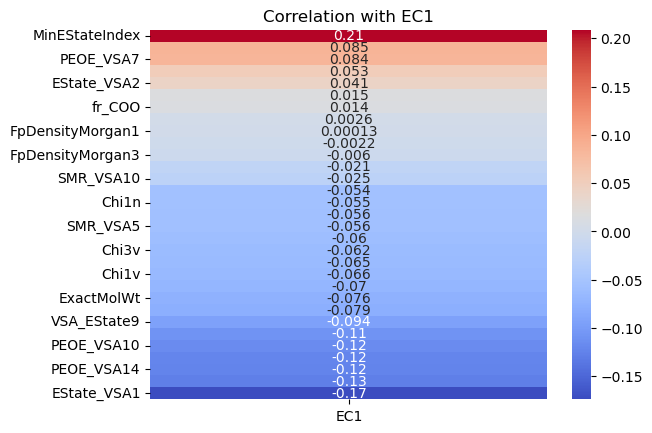

In [7]:
corr_matrix_ec1=df_train_model_ec1.corr()
target_corr_ec=corr_matrix_ec1['EC1'].drop('EC1')
corr_matrix_ec1_sorted=target_corr_ec.sort_values(ascending=False)

sns.heatmap(corr_matrix_ec1_sorted.to_frame(),cmap='coolwarm',annot=True)
plt.title('Correlation with EC1')
plt.show()

In [8]:
df_train_model_ec2=df_train.copy()
df_train_model_ec2.drop(['id','EC1','EC3','EC4','EC5','EC6'], axis=1, inplace=True)

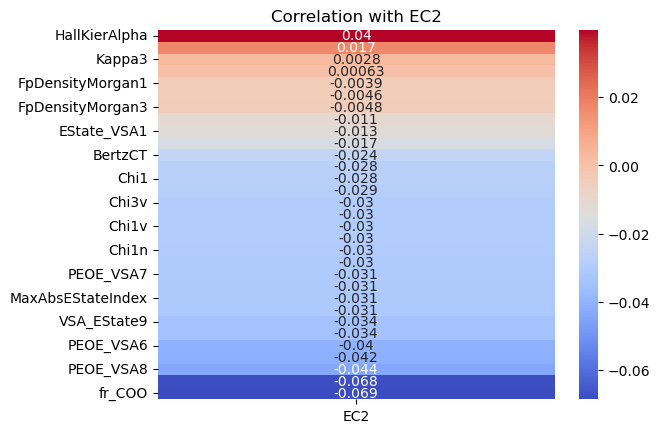

In [9]:
corr_matrix_ec2=df_train_model_ec2.corr()
target_corr_ec2=corr_matrix_ec2['EC2'].drop('EC2')
corr_matrix_ec2_sorted=target_corr_ec2.sort_values(ascending=False)

sns.heatmap(corr_matrix_ec2_sorted.to_frame(),cmap='coolwarm',annot=True)
plt.title('Correlation with EC2')
plt.show()

In [10]:
def preprocess_data(data):
    scaler=StandardScaler()
    numerical_features=data.columns[:-2]
    data[numerical_features]=scaler.fit_transform(data[numerical_features])
    return data

In [11]:
x_ec1=df_train_model_ec1.copy()
x_ec2=df_train_model_ec2.copy()

x_ec1.drop(['EC1'], axis=1, inplace=True)
x_ec2.drop(['EC2'], axis=1, inplace=True)

In [12]:
y_ec1=df_train_model_ec1.copy()
y_ec2=df_train_model_ec2.copy()

y_ec1=y_ec1[['EC1']]
y_ec2=y_ec2[['EC2']]

In [13]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_ec1,y_ec1,test_size=0.25,random_state=1)
x2_train,x2_test,y2_train,y2_test=train_test_split(x_ec2,y_ec2,test_size=0.25,random_state=1)

In [14]:
y_ec1

,EC1
0,1
1,0
2,1
3,1
4,1
...,...
14833,1
14834,0
14835,1
14836,0


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
GBC1=GradientBoostingClassifier()
GBC1.fit(x1_train,y1_train)

GradientBoostingClassifier()